In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
center_info = pd.read_csv('fulfilment_center_info.csv')
meal_info = pd.read_csv('meal_info.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [4]:
print('center_info.center_type unique_values are : {} \n'.format(center_info['center_type'].unique()))
print('center_info.op_area unique_values are : {} \n'.format(center_info['op_area'].unique()))

center_info.center_type unique_values are : ['TYPE_A' 'TYPE_B' 'TYPE_C'] 

center_info.op_area unique_values are : [3.7 6.7 4.  4.1 3.6 4.4 3.9 2.8 3.8 2.4 2.9 4.5 2.7 3.  3.4 4.6 5.  5.1
 2.  0.9 4.8 5.3 7.  4.2 4.7 1.9 6.3 5.6 3.2 3.5] 



In [5]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
print('mean_info.category unique_values are : {} \n'.format(meal_info['category'].unique()))
print('mean_info.cuisine unique_values are : {} \n'.format(meal_info['cuisine'].unique()))

mean_info.category unique_values are : ['Beverages' 'Extras' 'Soup' 'Other Snacks' 'Salad' 'Rice Bowl' 'Starters'
 'Sandwich' 'Pasta' 'Desert' 'Biryani' 'Pizza' 'Fish' 'Seafood'] 

mean_info.cuisine unique_values are : ['Thai' 'Indian' 'Italian' 'Continental'] 



In [7]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [8]:
print('train.week unique_values are : {} \n'.format(train['week'].unique()))
print('train.emailer_for_promotion unique_values are : {} \n'.format(train['emailer_for_promotion'].unique()))

train.week unique_values are : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145] 

train.emailer_for_promotion unique_values are : [0 1] 



In [9]:
train.homepage_featured.unique()

array([0, 1], dtype=int64)

### checking for missing value

In [10]:
meal_info.isnull().head(3)

,meal_id,category,cuisine
0,False,False,False
1,False,False,False
2,False,False,False


In [11]:
meal_info.isnull().sum(axis = 1)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
dtype: int64

In [12]:
meal_info.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

In [13]:
center_info.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [14]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

##### OBSERVATION : There is no missing value in the dataset.

In [15]:
# Combining the data usign merge function
data = train.merge(meal_info, on='meal_id')
data = data.merge(center_info, on = 'center_id')
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [16]:
test = test.merge(meal_info , on = 'meal_id')
test = test.merge(center_info, on = 'center_id')
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [17]:
data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [18]:
data.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

## checking for duplicate rows

In [19]:
duplicate_rows = data[data.duplicated()]
#print(“number of duplicate rows: “, duplicate_rows.shape)
duplicate_rows.shape

(0, 15)

#### There are no duplicate rows

### Checking for Outliers

In [20]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20)
X = data[['checkout_price','num_orders']]
X = X.copy()
y_pred = clf.fit_predict(X)

In [21]:
X_pred_outliers = [each[1] for each in list(zip(y_pred, list(X))) if each[0] == -1]

In [22]:
X_pred_outliers

[]

### NO outliers, I think i didn't used this method correctly. Need to check for it again!!

## EDA

### Univariate : checking for the behaviour of single variable

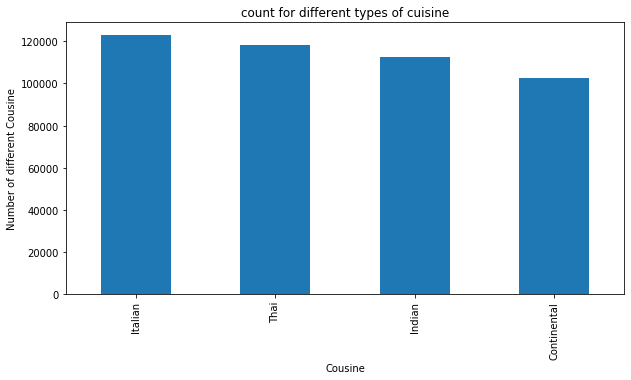

In [23]:
data.cuisine.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('count for different types of cuisine')
plt.ylabel('Number of different Cousine')
plt.xlabel('Cousine');
plt.savefig("Count for different types of cuisine")

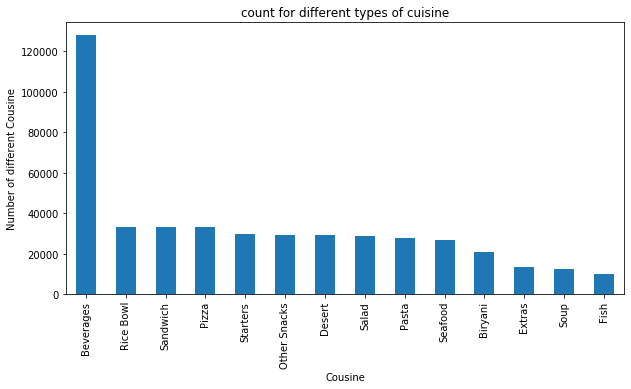

In [24]:
data.category.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('count for different types of cuisine')
plt.ylabel('Number of different Cousine')
plt.xlabel('Cousine');

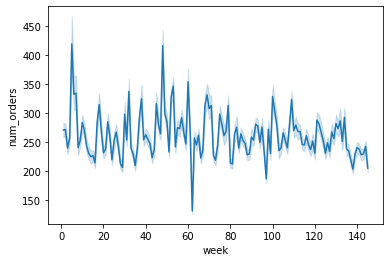

In [25]:
sn.lineplot(train['week'],train['num_orders'])
plt.savefig("Number of order Vs weeks")

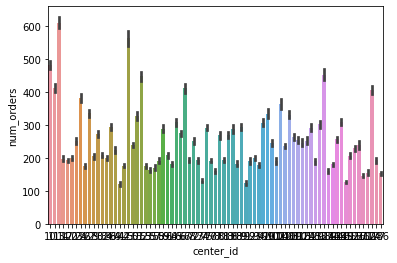

In [26]:
sn.barplot(train['center_id'],train['num_orders'])


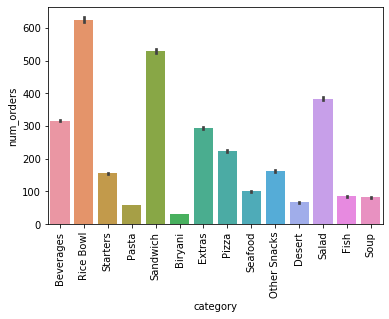

In [27]:
sn.barplot(data['category'],data['num_orders'])
plt.xticks(rotation = '90')
plt.savefig('NUmber of order category vise')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


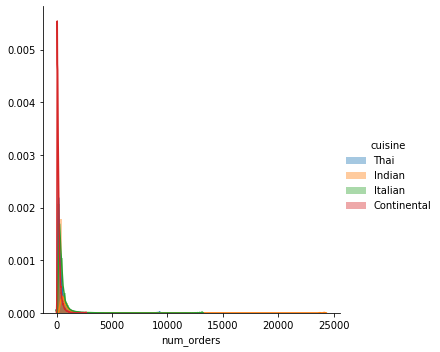

In [28]:
sn.FacetGrid(data, hue="cuisine", size=5) \
   .map(sn.distplot, "num_orders") \
   .add_legend();
plt.show();

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


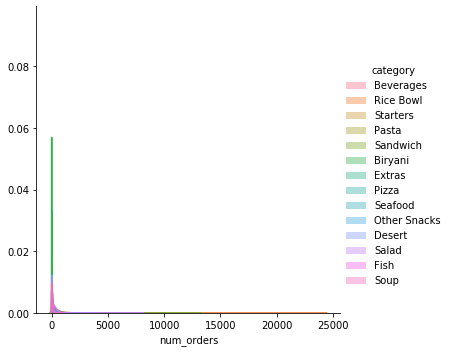

In [29]:
sn.FacetGrid(data, hue = 'category', size = 5) \
   .map(sn.distplot, 'num_orders') \
   .add_legend()

### Bivariate : Checking for the relation between two variables if any.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x720 with 0 Axes>

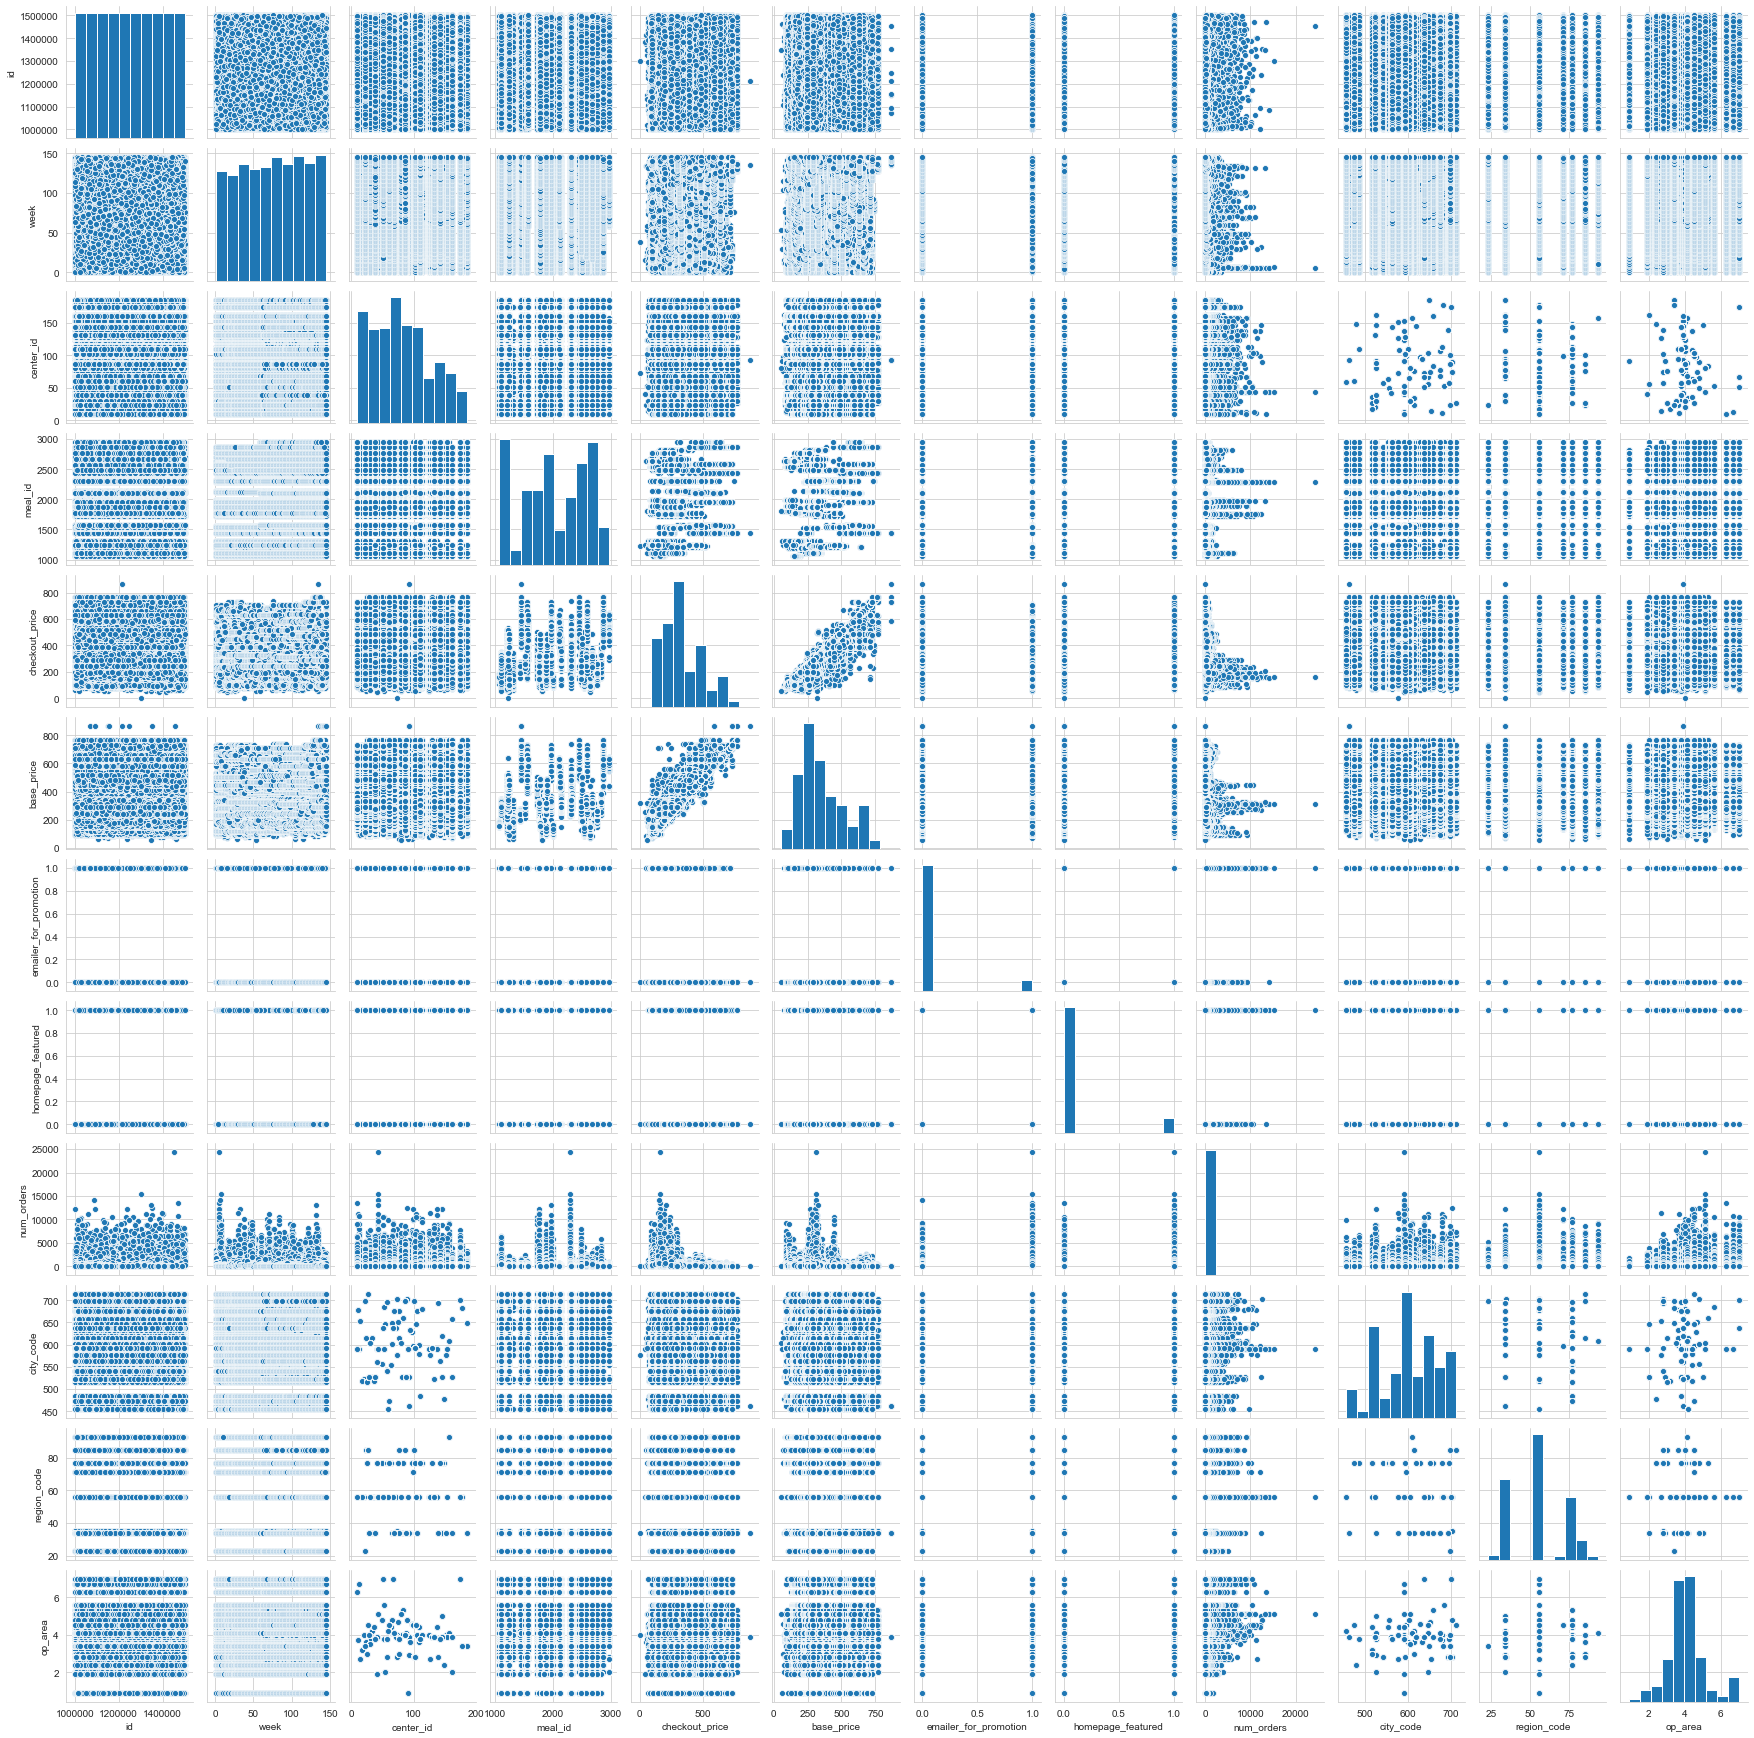

In [30]:
plt.close()
plt.figure(figsize = (20,10))
sn.set_style('whitegrid')
sn.pairplot(data, size = 2)
plt.show()

#### Got nothing from above graph, pairplot sucks

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,0.018031
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976
city_code,-0.000387,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476


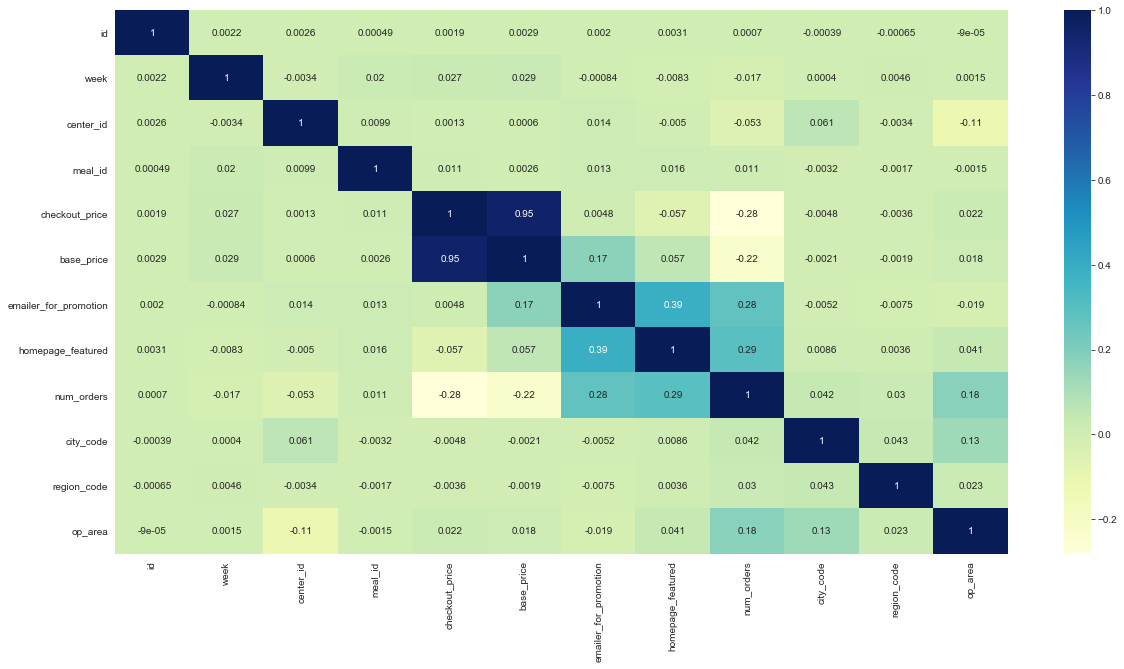

In [31]:
plt.figure(figsize=(20,10))
c= data.corr()
sn.heatmap(c,cmap='YlGnBu',annot=True)
c

#### 1.Base price and checkout Price are highly correlated, So we can remove base price

In [32]:
new_data = data.drop('base_price', axis = 1)

In [33]:
new_data.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


#### Box Plots

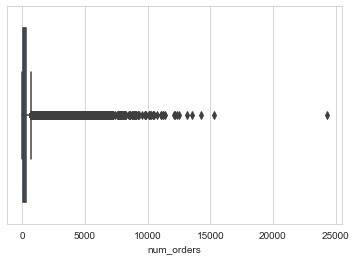

In [34]:
sn.boxplot(x='num_orders', data = data)

In [35]:
data['num_orders']

0         177
1         323
2          96
3         163
4         215
         ... 
456543     13
456544     42
456545     40
456546     53
456547     27
Name: num_orders, Length: 456548, dtype: int64

In [36]:
data[data['num_orders']< 15000]['num_orders']


0         177
1         323
2          96
3         163
4         215
         ... 
456543     13
456544     42
456545     40
456546     53
456547     27
Name: num_orders, Length: 456546, dtype: int64

In [37]:
outlier_index = train[train['num_orders']>15000].index

In [38]:
outlier_index


Int64Index([14050, 19700], dtype='int64')

In [39]:
new_data = train.drop(outlier_index)

### Removed outliers 

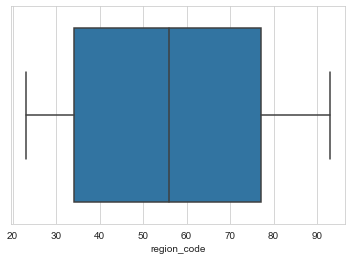

In [40]:
sn.boxplot(x='region_code', data = data)

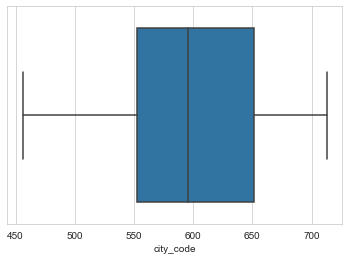

In [41]:
sn.boxplot(x = 'city_code', data = data)

### du ddu du ddu

In [42]:
new_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


### let's check for number of center_id and city_code

In [43]:
print('Total number of centers : {} '.format(new_data['center_id'].unique().shape))
print('Total number of cities : {}'.format(new_data['city_code'].unique().shape))
print('Total number of region : {}'.format(new_data['region_code'].unique().shape))
print('Total number of unique meal : {}'.format(new_data['meal_id'].unique().shape))

Total number of centers : (77,) 


KeyError: 'city_code'

In [ ]:
77*51

### obs -: Mean's there more #centers than #cities. Implying some cities have more than 1 centers

In [ ]:
print('unique pair of center_id and meal_id -: ') 
print(((new_data['center_id'].astype(str) + '_' + new_data['meal_id'].astype(str) ).unique()).shape)
center_meal_train = (train['center_id'].astype(str) + "_" + train['meal_id'].astype(str)).unique()

print('\n'+'*'*100 + '\n' )

print('unique pair of city_code and meal_id -: ') 
print(((new_data['city_code'].astype(str) + '_' + new_data['meal_id'].astype(str) ).unique()).shape)

### obs -: There must be 77*51 = 3927 center-meal pair but there are only 3597 pairs. So, some of the centers are not selling all the types of meal

In [ ]:
# checking if test data have new center and meal pair
print('unique pair of center_id and meal_id for test data -: ') 
print(((test['center_id'].astype(str) + '_' + test['meal_id'].astype(str) ).unique()).shape)
center_meal_test = (test['center_id'].astype(str) + "_" + test['meal_id'].astype(str)).unique()

mean's  there is some meal that are sold any more.

In [ ]:
print('There are ' ,len(set(center_meal_test) - set(center_meal_train)), 'center-meal pair that are new in test data')
print(set(center_meal_test) - set(center_meal_train))